# Areal Project

Challenge solved by:
- Phan Anh Vu: (phanav)
- Mohamed Salem Messoud: (mdsalem17)

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for raw data (images)</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

The next cell will install all the required dependencies on your computer. You should consider replacing pip with pip3 if pip is related to python2.7 on your computer, or comment it if you already have the dependencies/are running in the docker of the challenge (runnable with the name areal/codalab:pytorch if you know how to run a docker).

In [1]:
#!pip install --user -r requirements.txt

In [2]:
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
import sys
from pathlib import Path
import shutil

In [3]:
root_dir = Path("..")

In [4]:
str_ = str(os.getcwd())
print(str_)
starting_dir = Path(str_)
print(root_dir)
starting_dir = root_dir.joinpath("starting_kit")
print(starting_dir)
if str_.endswith('starting_kit'):
    str_ = str_[:-len('starting_kit')]
print(str_)

/Users/md_76s/Desktop/Files/starting_kit
..
../starting_kit
/Users/md_76s/Desktop/Files/


In [5]:
#root_dir = Path("/content/drive/MyDrive/Education/Master Informatique IA Computer Science AI Paris Saclay/AI/OPT9 Datacamp/TP5 Aerial")
root_dir = Path(str_)

starting_dir = root_dir.joinpath("starting_kit")
os.chdir(starting_dir)

print(os.listdir(root_dir))
print(os.listdir(starting_dir))

['.DS_Store', 'starting_kit.zip', 'models', 'readme.md', 'public_data', 'starting_kit', 'image_data', 'models.zip']
['scoring_output', 'tensorflow_model.ipynb', 'requirements.txt', 'sample_result_submissionAreal_valid.predict', 'sample_result_submissionAreal_test.predict', 'fastai_model.ipynb', 'sample_code_submission', 'sample_result_submission', 'fastai_model-Copy1.ipynb', 'README.md', 'sample_data', 'logo.jpg', 'submissions', 'sample_result_submissionAreal_train.predict', '.ipynb_checkpoints', 'scoring_program', 'BasicCNN.ipynb', 'ingestion_program']


In [6]:
model_dir = 'sample_code_submission'
result_dir = 'sample_result_submission/'
problem_dir = 'ingestion_program/'
score_dir = 'scoring_program/'

In [7]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

Go through the challenge website and watch the trailer video.

#### Question 1: Briefly explain the problem.

*The task is to classify the images into one of 13 different categories each by assigning the correct tag. The categories are:
Beach, Chaparral, Cloud, Desert, Forest, Island, Lake, Meadow, Mountain, River, Sea Ice, Snowberg, Wetland.*

#### Question 2: What is the scoring metric used to evaluate submissions?

The scoring metric used is the basic Accuracy given by the formula below. Accuracy is the proportion of true predictions among the total number of cases examined.


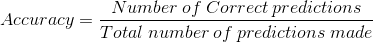

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [8]:
sample_data_dir = starting_dir.joinpath("sample_data")
public_data_dir = root_dir.joinpath("public_data")
data_name = 'Areal'

In [9]:
from ingestion_program import data_converter

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
Files being big, your computer needs to have enough space available in your RAM. It should take about 3-4GB while loading and 1.5GB in the end.

In [10]:
from ingestion_program.data_io import read_as_df
data = read_as_df(str(sample_data_dir)  + '/' + data_name)

Reading /Users/md_76s/Desktop/Files/starting_kit/sample_data/Areal_train from AutoML format
Number of examples = 65
Number of features = 49152
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [11]:
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_128_126_R,pixel_128_126_G,pixel_128_126_B,pixel_128_127_R,pixel_128_127_G,pixel_128_127_B,pixel_128_128_R,pixel_128_128_G,pixel_128_128_B,target
0,145,145,121,113,113,89,73,75,53,65,...,191,164,134,196,169,139,202,175,145,desert
1,193,168,138,191,166,136,201,176,146,194,...,196,171,140,197,172,141,201,176,145,desert
2,83,86,67,65,68,49,73,78,58,78,...,115,110,91,115,107,88,141,133,114,meadow
3,16,52,48,15,51,47,15,52,45,15,...,65,83,61,58,75,56,68,85,66,river
4,60,79,47,80,99,67,62,81,51,45,...,182,197,202,121,135,144,120,137,147,mountain


In [12]:
data.describe()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_128_125_B,pixel_128_126_R,pixel_128_126_G,pixel_128_126_B,pixel_128_127_R,pixel_128_127_G,pixel_128_127_B,pixel_128_128_R,pixel_128_128_G,pixel_128_128_B
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,96.630769,102.030769,93.676923,97.230769,102.661538,94.323077,94.353846,99.584615,91.230769,93.076923,...,98.015385,99.307692,103.800000,94.523077,97.369231,101.738462,93.076923,95.800000,100.323077,91.600000
std,63.041794,52.057051,52.828765,64.983356,53.971427,54.017679,63.980815,53.380091,53.738594,64.282168,...,58.560463,63.085241,54.084194,55.020765,60.896575,50.817467,51.335389,55.726509,43.865956,43.464713
min,13.000000,14.000000,14.000000,6.000000,13.000000,12.000000,9.000000,13.000000,11.000000,11.000000,...,12.000000,10.000000,15.000000,9.000000,14.000000,19.000000,14.000000,17.000000,22.000000,18.000000
25%,53.000000,63.000000,52.000000,44.000000,64.000000,49.000000,46.000000,60.000000,48.000000,45.000000,...,60.000000,55.000000,63.000000,58.000000,53.000000,60.000000,56.000000,53.000000,64.000000,55.000000
50%,82.000000,88.000000,85.000000,80.000000,96.000000,88.000000,74.000000,87.000000,84.000000,77.000000,...,90.000000,73.000000,90.000000,74.000000,74.000000,97.000000,86.000000,76.000000,96.000000,92.000000
75%,141.000000,137.000000,135.000000,139.000000,145.000000,136.000000,136.000000,140.000000,136.000000,136.000000,...,121.000000,152.000000,141.000000,128.000000,138.000000,144.000000,130.000000,135.000000,137.000000,132.000000
max,239.000000,240.000000,245.000000,237.000000,239.000000,242.000000,239.000000,238.000000,243.000000,240.000000,...,255.000000,240.000000,249.000000,254.000000,235.000000,245.000000,254.000000,232.000000,212.000000,218.000000


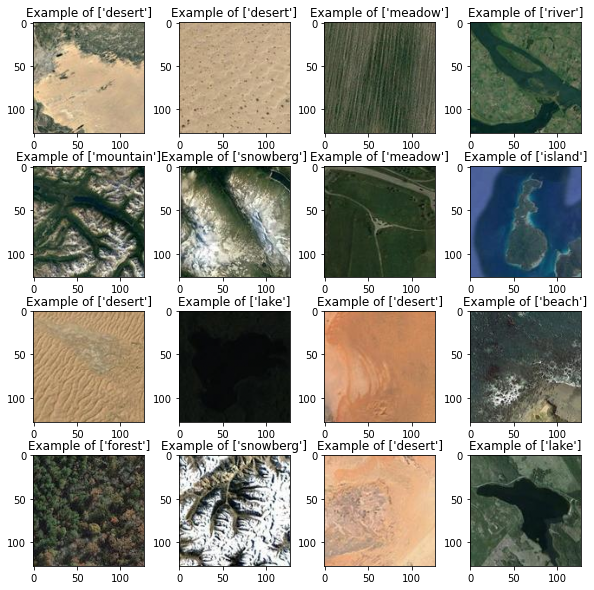

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 16
fig, _axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(128,128,3)
    label = data.iloc[i].values[-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

Let's see the color histogram of the previous images to see how does the contrast vary according to the image class

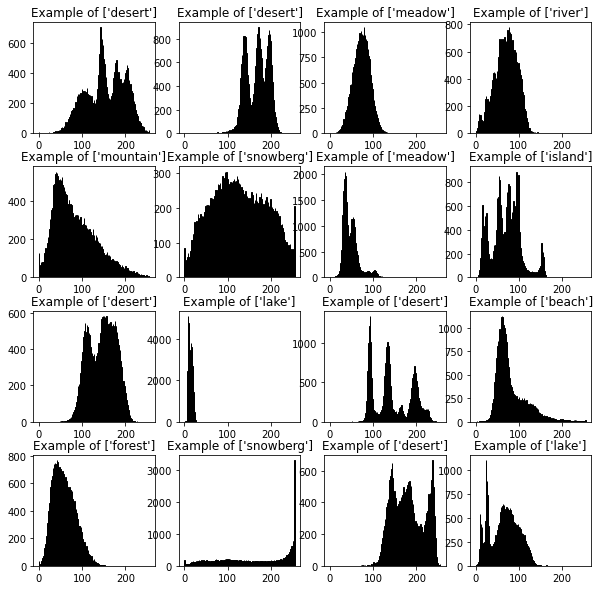

In [14]:
num_toshow = 16
fig, _axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(128,128,3)
    label = data.iloc[i].values[-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].hist(img.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k')

plt.show()

We can see from those histograms :
- for  images belonging to class 'desert', the colors of the majority of pixels vary between 100 and 200
- for  images belonging to class A, the colors fluctuate between _ and _
- for  images belonging to class A, the colors fluctuate between _ and _
- for  images belonging to class A, the colors fluctuate between _ and _
- for  images belonging to class A, the colors fluctuate between _ and _


In [15]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

      target
0     desert
1     desert
2     meadow
3      river
4   mountain
..       ...
60    island
61    island
62      lake
63     beach
64    forest

[65 rows x 1 columns]


In [16]:
print(X.shape, y.shape)

(65, 49152) (65, 1)


#### Code 1: compute statistics of the dataset.

* How many features?
* How many data points?
* How many classes?
* What is the most represented class?
* What is the least represented class?

*From above, we have 5200 examples for the full dataset, with 128x128x3 = 49152 features(128x128 pixels, r,g,b), and 13 classes. And from below, we can see that it is a well balanced dataset with all classes having the same number of examples, and this is still the case for the full dataset*.

In [17]:
y['target'].value_counts()

cloud        5
river        5
wetland      5
lake         5
beach        5
sea          5
chaparral    5
forest       5
desert       5
mountain     5
island       5
snowberg     5
meadow       5
Name: target, dtype: int64

# Step 2 : Building a predictive model

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
This time, also, still make sure that your RAM has at least 2-3GB available.

In [18]:
from ingestion_program.data_manager import DataManager
D = DataManager(data_name, str(public_data_dir), replace_missing=False, verbose=True)
print(D)

Info file found : /Users/md_76s/Desktop/Files/public_data/Areal_public.info
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_feat.type
[+] Success in  0.00 sec
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_train.data
[+] Success in 180.75 sec
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_train.solution
[+] Success in  0.05 sec
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_valid.data
[+] Success in 67.11 sec
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_valid.solution
[+] Success in  0.00 sec
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_test.data
[+] Success in 67.24 sec
========= Reading /Users/md_76s/Desktop/Files/public_data/Areal_test.solution
[+] Success in  0.00 sec
DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 491

In [19]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [20]:
print(X_train.shape, Y_train.shape)
print(Y_train[:5])

(5200, 49152) (5200, 1)
[[5]
 [0]
 [0]
 [1]
 [0]]


[0]


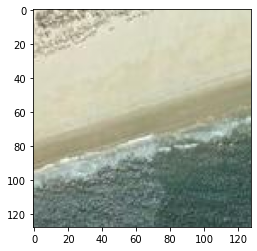

In [21]:
sample_idx = 4
plt.imshow(X_train[sample_idx].reshape(128,128,3).astype(float) / 255)
print(Y_train[sample_idx])

Labels codes: \
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland

### Processing

Basically, there are two approaches:

* Use raw data as input. This may be the good way to go with, for instance, deep learning models.
* Do feature engineering: process the data to create features. You can then use this features as the input of your classifier (Random forest, SVM, etc.). An example of feature is the number of blue pixel in the image. Feature extraction can also be done by a CNN.

### Use of the baseline model

Using our BasicCNN model needs PyTorch libraries installed.

In case you have them but still encounter errors related to them, you should probably do an upgrade : 

    pip install -U torch

Our model is a simple implementation of a Convolutional Neural Network (CNN).

More information on CNN:
* [Convolutional neural network on Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
* [A Comprehensive Guide to Convolutional Neural Networks (blog)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In [22]:
#!pip install -U torch
from model import BasicCNN
#from sample_code_submission import model

In [23]:
m = BasicCNN(learning_rate=0.01, batch_size = 64, nb_epoch=50, verbose=True)
trained_model_name = model_dir + data_name

In [24]:
m.fit(X_train, Y_train)

Epoch 0 : loss = 2.476344
Epoch 1 : loss = 2.392633
Epoch 2 : loss = 2.360804
Epoch 3 : loss = 2.343581
Epoch 4 : loss = 2.331655
Epoch 5 : loss = 2.322465
Epoch 6 : loss = 2.315218
Epoch 7 : loss = 2.309077
Epoch 8 : loss = 2.303280
Epoch 9 : loss = 2.297556
Epoch 10 : loss = 2.292249
Epoch 11 : loss = 2.287601
Epoch 12 : loss = 2.283597
Epoch 13 : loss = 2.280150
Epoch 14 : loss = 2.277170
Epoch 15 : loss = 2.274578
Epoch 16 : loss = 2.272307
Epoch 17 : loss = 2.270303
Epoch 18 : loss = 2.268523
Epoch 19 : loss = 2.266935
Epoch 20 : loss = 2.265509
Epoch 21 : loss = 2.264224
Epoch 22 : loss = 2.263057
Epoch 23 : loss = 2.261995
Epoch 24 : loss = 2.261023
Epoch 25 : loss = 2.260130
Epoch 26 : loss = 2.259307
Epoch 27 : loss = 2.258545
Epoch 28 : loss = 2.257840
Epoch 29 : loss = 2.257183
Epoch 30 : loss = 2.256571
Epoch 31 : loss = 2.255998
Epoch 32 : loss = 2.255460
Epoch 33 : loss = 2.254954
Epoch 34 : loss = 2.254476
Epoch 35 : loss = 2.254025
Epoch 36 : loss = 2.253599
Epoch 37 : 

In [25]:
Y_hat_train = m.predict(D.data['X_train'])
Y_hat_valid = m.predict(D.data['X_valid'])
Y_hat_test = m.predict(D.data['X_test'])

In [26]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


#### Question 3: What are the hyperparameters of a CNN?

The hyperparameters of a CNN are:
- Learning rate
- Number of epochs: the number of times training data is shown to the network during training
- Batch size: the number of sub-samples given to the network after which the parameter update occurs.
- use_cuda: to configure and execute CUDA operations
- criterion: or the loss function, generally using the cross-entropy loss function

Basically, a hyperparameter is a parameter whose value is used to control the learning process, it is set before the learning process.
- Optimizer: gradient-based optimization algorithms, the most popular Adam, Adagrad is used here
- number of layers, the structure of every layer and it activation function, etc.

#### Code 2: Edit model.py to vary the CNN's hyperparameter

In [27]:
#TODO in model.py

# Scoring the result

In [28]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [29]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid']) > 0 and len(D.data['Y_test']) > 0:
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000
Training score for the accuracy metric = 0.4819


## Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_train, Y_hat_train)

#### Question 4: what does the confusion matrix represent?

The confusion matrix is a measure of performance for classification models. It gives a holistic view of our model's performance.

A confusion matrix is a square matrix of order K, where K is the number of target classes. It compares the actual target values with those predicted by our model, it counts the number of times instances of class A are classified as class B. From there, we can know how good our model classification works and what types of errors it is making.

#### Code 4: display the confusion matrix with a colored heatmap

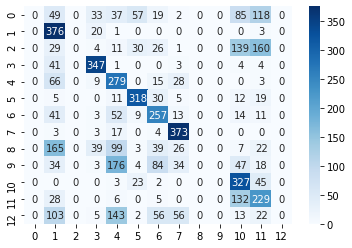

In [31]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

## Cross validation

In [32]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(BasicCNN(), X_train, Y_train, cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '



CV score (95 perc. CI): 0.45 (+/- 0.03)


#### Question 5: Why is there a standard deviation associated with the cross-validation score?

The standard deviation associated with the cross-validation score can be used as a rudimentary measure of the stability of the classifier. It summarizes the expected variance in model performance and assesses our degree of certainty about these estimates.

In the case of having multiple models with approximately the same mean cross-validation score, we should opt for the model that has the least standard deviation score.

The standard deviation is a useful estimate but not entirely valid because we calculate the standard error as if the folds were independent observations. Obviously, this is not the case, they share some training examples. There is a correlation between them.
Mathematically proven, it's actually a pretty good estimate.

"All models are wrong, but some are useful"



# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [34]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

python3: can't open file '/ingestion.py': [Errno 2] No such file or directory


### Test scoring program

In [35]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

python3: can't open file '/score.py': [Errno 2] No such file or directory


# Prepare the submission

In [36]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './submissions/sample_code_submission_' + the_date + '.zip'
sample_result_submission = './submissions/sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
./submissions/sample_code_submission_20-12-30-23-37.zip
./submissions/sample_result_submission_20-12-30-23-37.zip
